In [1]:
import re
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('1.csv')

In [3]:
new_column_names = {old_name: str(i + 1) for i, old_name in enumerate(df.columns)}

# Apply the new column names to the DataFrame
df_renamed = df.rename(columns=new_column_names)

In [4]:
columns_to_keep_1 = [
    "38"
]
columns_to_keep_2 = [
    "48"
]
columns_to_keep_3 = [
    "49"
]
df1 = df_renamed[columns_to_keep_1]
df2 = df_renamed[columns_to_keep_2]
df3 = df_renamed[columns_to_keep_3]

In [5]:
df1 = df1.dropna()
df2 = df2.dropna()
df3 = df3.dropna()

In [6]:
# Define a function to perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

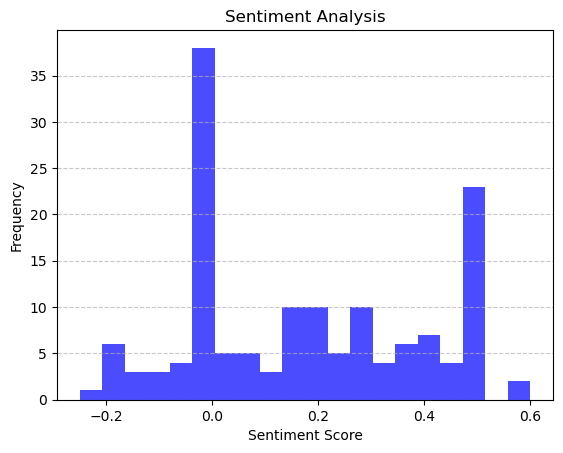

In [7]:
# Apply sentiment analysis to each review
sentiment_scores_1 = df1['38'].apply(analyze_sentiment)
# Plotting
plt.hist(sentiment_scores_1, bins=20, color='blue', alpha=0.7)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

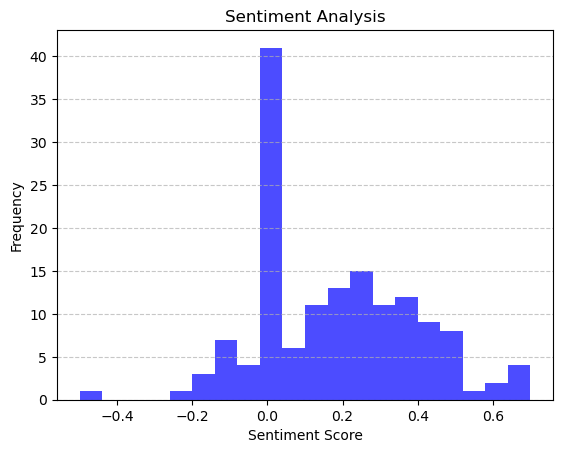

In [8]:
sentiment_scores_2 = df2['48'].apply(analyze_sentiment)
# Plotting
plt.hist(sentiment_scores_2, bins=20, color='blue', alpha=0.7)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

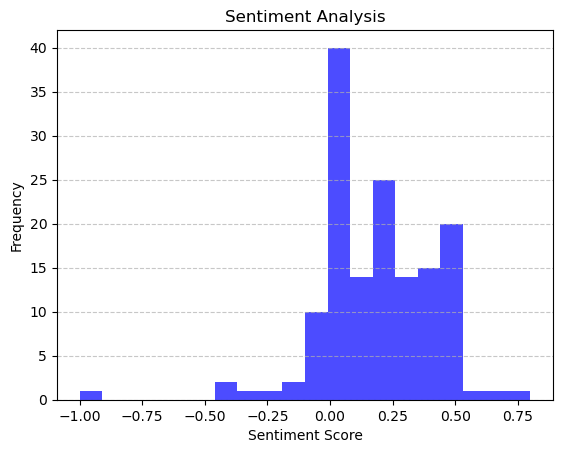

In [9]:
sentiment_scores_3 = df3['49'].apply(analyze_sentiment)
# Plotting
plt.hist(sentiment_scores_3, bins=20, color='blue', alpha=0.7)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [10]:
# Create a new DataFrame for scores
df_scores_1 = pd.DataFrame({'Sentiment Score': sentiment_scores_1})
df_scores_2 = pd.DataFrame({'Sentiment Score': sentiment_scores_2})
df_scores_3 = pd.DataFrame({'Sentiment Score': sentiment_scores_3})

# Separate positive and negative scores
df_scores_1['Positive Score'] = df_scores_1['Sentiment Score'].apply(lambda x: x if x > 0 else np.nan)
df_scores_1['Negative Score'] = df_scores_1['Sentiment Score'].apply(lambda x: x if x < 0 else np.nan)
df_scores_2['Positive Score'] = df_scores_2['Sentiment Score'].apply(lambda x: x if x > 0 else np.nan)
df_scores_2['Negative Score'] = df_scores_2['Sentiment Score'].apply(lambda x: x if x < 0 else np.nan)
df_scores_3['Positive Score'] = df_scores_3['Sentiment Score'].apply(lambda x: x if x > 0 else np.nan)
df_scores_3['Negative Score'] = df_scores_3['Sentiment Score'].apply(lambda x: x if x < 0 else np.nan)

C:\Users\nevea\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nevea\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


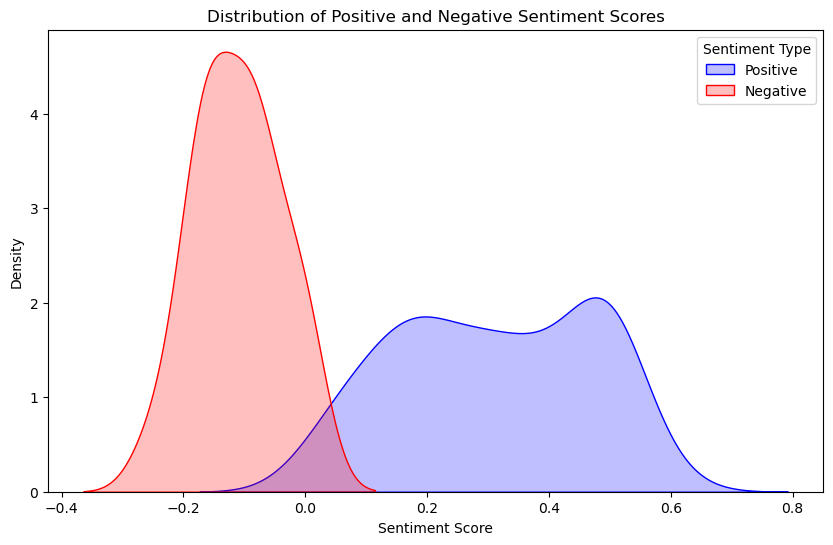

In [11]:
plt.figure(figsize=(10, 6))

# Plot KDE for positive scores
sns.kdeplot(df_scores_1['Positive Score'].dropna(), color="blue", fill=True, label='Positive')

# Plot KDE for negative scores
sns.kdeplot(df_scores_1['Negative Score'].dropna(), color="red", fill=True, label='Negative')

# Enhance the plot with labels and a legend
plt.title('Distribution of Positive and Negative Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.legend(title='Sentiment Type')

plt.show()


C:\Users\nevea\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nevea\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


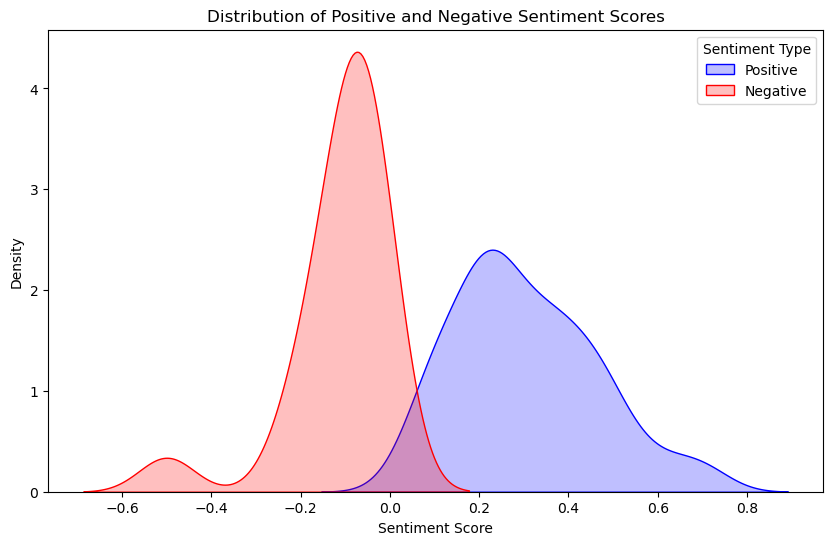

In [12]:
plt.figure(figsize=(10, 6))

# Plot KDE for positive scores
sns.kdeplot(df_scores_2['Positive Score'].dropna(), color="blue", fill=True, label='Positive')

# Plot KDE for negative scores
sns.kdeplot(df_scores_2['Negative Score'].dropna(), color="red", fill=True, label='Negative')

# Enhance the plot with labels and a legend
plt.title('Distribution of Positive and Negative Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.legend(title='Sentiment Type')

plt.show()


C:\Users\nevea\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nevea\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


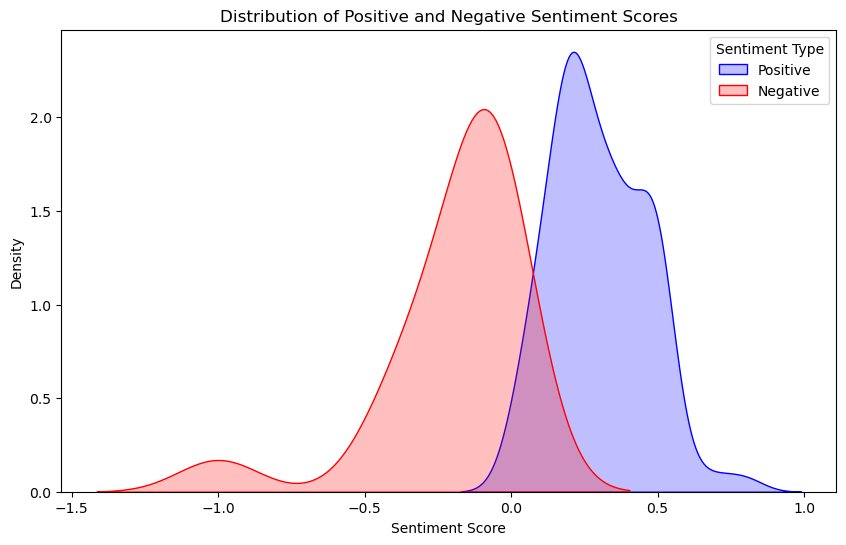

In [13]:
plt.figure(figsize=(10, 6))

# Plot KDE for positive scores
sns.kdeplot(df_scores_3['Positive Score'].dropna(), color="blue", fill=True, label='Positive')

# Plot KDE for negative scores
sns.kdeplot(df_scores_3['Negative Score'].dropna(), color="red", fill=True, label='Negative')

# Enhance the plot with labels and a legend
plt.title('Distribution of Positive and Negative Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.legend(title='Sentiment Type')

plt.show()


In [14]:
# Define a function to perform sentiment analysis using TextBlob
def classification_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0.2:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

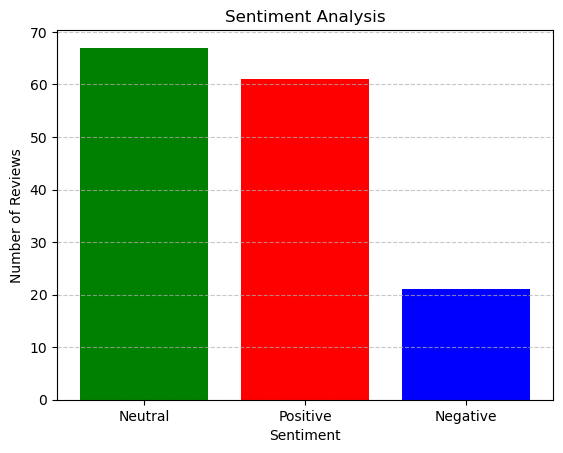

In [15]:
# Apply sentiment analysis to each review
sentiment_labels_1 = df1['38'].apply(classification_sentiment)

# Count the number of reviews in each sentiment category
sentiment_counts_1 = sentiment_labels_1.value_counts()

# Plotting
plt.bar(sentiment_counts_1.index, sentiment_counts_1.values, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Analysis')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


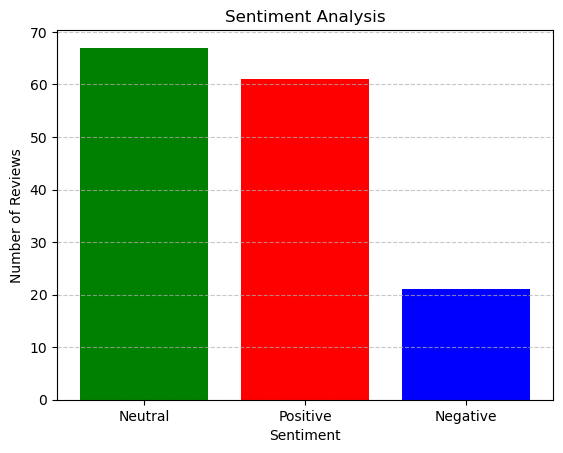

In [16]:
# Apply sentiment analysis to each review
sentiment_labels_2 = df2['48'].apply(classification_sentiment)

# Count the number of reviews in each sentiment category
sentiment_counts_2 = sentiment_labels_2.value_counts()

# Plotting
plt.bar(sentiment_counts_1.index, sentiment_counts_1.values, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Analysis')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


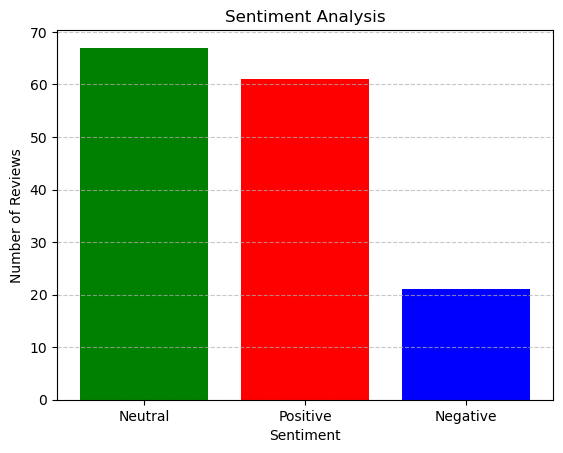

In [17]:
# Apply sentiment analysis to each review
sentiment_labels_3 = df3['49'].apply(classification_sentiment)

# Count the number of reviews in each sentiment category
sentiment_counts_3 = sentiment_labels_3.value_counts()

# Plotting
plt.bar(sentiment_counts_1.index, sentiment_counts_1.values, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Analysis')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
